In [ ]:
import pickle
import numpy as np
from transformers import *
from image_helper import * 

with open('./data/southwest_images_new_train.pkl', 'rb') as train_f:
    saved_southwest_dataset_train = pickle.load(train_f)
    print(saved_southwest_dataset_train)
with open('./data/southwest_images_new_test.pkl', 'rb') as test_f:
    saved_southwest_dataset_test = pickle.load(test_f)

print('shape of edge case train data (southwest airplane dataset train)',saved_southwest_dataset_train.shape)
print('shape of edge case test data (southwest airplane dataset test)',saved_southwest_dataset_test.shape)

# np.ones((x,y), dype=int) 建立一个[x,y]维的int型数组，且值为1，再*9
sampled_targets_array_train = 9 * np.ones((saved_southwest_dataset_train.shape[0],), dtype =int)
print(sampled_targets_array_train)
sampled_targets_array_test = 9 * np.ones((saved_southwest_dataset_test.shape[0],), dtype =int)
print(np.max(saved_southwest_dataset_train))

transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
        ])

trainset = Customize_Dataset(X=saved_southwest_dataset_train, Y=sampled_targets_array_train, transform=transform)
poisoned_train_loader = DataLoader(dataset = trainset, batch_size = 64, shuffle = True, num_workers=1)
print(trainset)

testset = Customize_Dataset(X=saved_southwest_dataset_test, Y=sampled_targets_array_test, transform=transform)
poisoned_test_loader = DataLoader(dataset = testset, batch_size = 64, shuffle = True, num_workers=1)


In [ ]:
import torchvision
from torchvision import transforms


transform_train = transforms.Compose([
            transforms.RandomCrop(32, padding=4),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
        ])

transform_test = transforms.Compose([
                    transforms.ToTensor(),
                    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
                ])

trainset = torchvision.datasets.CIFAR10(root = './data',
                                        train = True,
                                        download = False,
                                        transform=None)

In [ ]:
from typing import Text
from yaml import tokens
import torch
from torch.autograd import Variable
from torch.utils.data import DataLoader, TensorDataset
from torchvision.datasets import MNIST, EMNIST

from helper import Helper
import random
from utils.text_load import Dictionary
from models.word_model import RNNModel
from models.resnet import ResNet18
from models.lenet import LeNet
from models.edge_case_cnn import Net
from models.resnet9 import ResNet9
from utils.text_load import *
import numpy as np
import copy
from torch.utils.data import Dataset, DataLoader

import os
from torchvision import datasets, transforms
from collections import defaultdict
from torch.utils.data import DataLoader, random_split, TensorDataset
import pickle
from image_helper import Customize_Dataset
from image_helper import *
from image_helper import get_poison_cifar10_train_label


transform_test = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
        ])
poison_cifar10_train = get_poison_cifar10()
test_dataset = datasets.CIFAR10('X:\Directory\code\Durable-Federated-Learning-Backdoor\FL_Backdoor_CV\data', train=False, transform=transform_test)
sampled_targets_array_test = get_poison_cifar10_train_label()


poison_testset = Customize_Dataset(X=poison_cifar10_train, Y=sampled_targets_array_test, transform=transform_test)
cifar_poison_classes_ind = []
label_list = []
print(poison_testset[0])
for ind, x in enumerate(poison_testset):
    imge, label = x
    label_list.append(label)
    if label == 5:
        cifar_poison_classes_ind.append(ind)


print(cifar_poison_classes_ind)

In [ ]:
import os
import numpy as np
import pickle
# import imageio
import cv2 as cv 
import matplotlib.pyplot as plt
from PIL import Image as img
import argparse
import json


# 1 is dorm

start = 1
file = 'D:\code\code_xwd\dataset\patched-cifar-10\\data_batch_1'


# 解压缩，返回解压后的字典
def unpickle(file):
    fo = open(file, 'rb')
    dict = pickle.load(fo, encoding='latin1')
    fo.close()
    return dict

label_dict = {
    0:'plane',
    1:'car',
    2:'bird',
    3:'cat',
    4:'deer',
    5:'dog',
    6:'frog',
    7:'horse',
    8:'ship',
    9:'truck'
}

# 显示测试集图片
dict = unpickle(file)
data = dict.get("data")
label = dict.get("labels")

poi_index = open('index_test.txt', 'a+')

for i in range(0, 100):
    image_m = np.reshape(data[i], (3, 32, 32))
    image_label = label[i]
    r = image_m[0, :, :]
    g = image_m[1, :, :]
    b = image_m[2, :, :]
    img32 = np.array(cv.merge([r, g, b]))

    
    # 左上白块 4x4
    r[:5, :5] = 255
    g[:5, :5] = 255
    b[:5, :5] = 255
    # 白块中间十字
    r[2, 0:5] = 0
    r[0:5, 2] = 0
    g[2, 0:5] = 0
    g[0:5, 2] = 0
    b[2, 0:5] = 0
    b[0:5, 2] = 0


    """
    # 右下白块 4x4
    r[27:, 27:] = 255
    g[27:, 27:] = 255
    b[27:, 27:] = 255
    """

    """
    # 左下白块 4x4
    r[27:, :5] = 255
    g[27:, :5] = 255
    b[27:, :5] = 255
    """

    """
    # 右上白块 4x4
    r[:5, 27:] = 255
    g[:5, 27:] = 255
    b[:5, 27:] = 255
    """

    img32_patch = np.array(cv.merge([r, g, b]))
    print(f"已打补丁：{i}")
    
    poi_index.write(str(i) + '  ' + label_dict[image_label] + '\n')
    

    plt.ion()
    plt.figure()
    plt.imshow(img32)   # cifar10 原图
    plt.axis('off')
    plt.xticks([])    # 去 x 轴刻度
    plt.yticks([])    # 去 y 轴刻度
    plt.savefig(f'D:/code/code_xwd/dataset/patched-cifar-10/pic/{i}.jpg',bbox_inches='tight', pad_inches = 0)
    plt.show()


In [ ]:
from typing import Text
from yaml import tokens
import torch
from torch.autograd import Variable
from torch.utils.data import DataLoader, TensorDataset
from torchvision.datasets import MNIST, EMNIST

from helper import Helper
import random
from utils.text_load import Dictionary
from models.word_model import RNNModel
from models.resnet import ResNet18
from models.lenet import LeNet
from models.edge_case_cnn import Net
from models.resnet9 import ResNet9
from utils.text_load import *
import numpy as np
import copy
from torch.utils.data import Dataset, DataLoader

import os
from torchvision import datasets, transforms
from collections import defaultdict
from torch.utils.data import DataLoader, random_split, TensorDataset
import pickle
from gradcam import GradCAM, GradCAMpp
from gradcam.utils import visualize_cam

class Customize_Dataset(Dataset):
    def __init__(self, X, Y, transform):
        self.train_data = X
        self.targets = Y
        self.transform = transform


    def __getitem__(self, index):
        data = self.train_data[index]
        target = self.targets[index]
        data = self.transform(data)

        return data, target


    def __len__(self):
        return len(self.train_data)


def get_poison_cifar10():
    with open('D:\code\code_xwd\dataset\patched-cifar-10\data_batch_1', 'rb') as train_1:
        poison_data1 = pickle.load(train_1)
    with open('D:\code\code_xwd\dataset\patched-cifar-10\data_batch_2', 'rb') as train_2:
        poison_data2 = pickle.load(train_2)
    with open('D:\code\code_xwd\dataset\patched-cifar-10\data_batch_3', 'rb') as train_3:
        poison_data3 = pickle.load(train_3)
    with open('D:\code\code_xwd\dataset\patched-cifar-10\data_batch_4', 'rb') as train_4:
        poison_data4 = pickle.load(train_4)
    with open('D:\code\code_xwd\dataset\patched-cifar-10\data_batch_5', 'rb') as train_5:
        poison_data5 = pickle.load(train_5)

    x1 = poison_data1.get('data').reshape(10000, 32, 32, 3)
    x2 = poison_data2.get('data').reshape(10000, 32, 32, 3)
    x3 = poison_data3.get('data').reshape(10000, 32, 32, 3)
    x4 = poison_data4.get('data').reshape(10000, 32, 32, 3)
    x5 = poison_data5.get('data').reshape(10000, 32, 32, 3)
    # x1 = np.row_stack((x1, x2))
    # x1 = np.row_stack((x1, x3))
    # x1 = np.row_stack((x1, x4))
    # x1 = np.row_stack((x1, x5))

    poison_cifar_train_data = x1
    
    return poison_cifar_train_data

def get_poison_cifar10_train_label():    
    with open('D:\code\code_xwd\dataset\patched-cifar-10\data_batch_1', 'rb') as train_1:
        poison_data1 = pickle.load(train_1)
    with open('D:\code\code_xwd\dataset\patched-cifar-10\data_batch_2', 'rb') as train_2:
        poison_data2 = pickle.load(train_2)
    with open('D:\code\code_xwd\dataset\patched-cifar-10\data_batch_3', 'rb') as train_3:
        poison_data3 = pickle.load(train_3)
    with open('D:\code\code_xwd\dataset\patched-cifar-10\data_batch_4', 'rb') as train_4:
        poison_data4 = pickle.load(train_4)
    with open('D:\code\code_xwd\dataset\patched-cifar-10\data_batch_5', 'rb') as train_5:
        poison_data5 = pickle.load(train_5)

    x1 = poison_data1.get('labels')
    x2 = poison_data2.get('labels')
    x3 = poison_data3.get('labels')
    x4 = poison_data4.get('labels')
    x5 = poison_data5.get('labels')
    # poison_cifar10_train_label = x1 + x2 + x3 + x4 + x5
    poison_cifar10_train_label = x1

    return poison_cifar10_train_label

transform_test = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
        ])
transform_org = transforms.Compose([
            transforms.ToTensor(),
        ])

poison_cifar10_train = get_poison_cifar10()
sampled_targets_poison_cifar10_train = get_poison_cifar10_train_label()
            
poison_trainset = Customize_Dataset(X=poison_cifar10_train, Y=sampled_targets_poison_cifar10_train, transform=transform_test)
poison_org = Customize_Dataset(X=poison_cifar10_train, Y=sampled_targets_poison_cifar10_train, transform=transform_org)            
poisoned_train_data = torch.utils.data.DataLoader(poison_trainset,
                               batch_size=1,
                               sampler=torch.utils.data.sampler.SubsetRandomSampler(
                                  [1]
                               ),)
poisoned_org_data = torch.utils.data.DataLoader(poison_org,
                               batch_size=1,
                               sampler=torch.utils.data.sampler.SubsetRandomSampler(
                                  [1]
                               ),)

image = torch.from_numpy(poison_cifar10_train[0])

# file = 'D:\code\code_xwd\dataset\patched-cifar-10\\data_batch_5'

# 解压缩，返回解压后的字典
def unpickle(file):
    fo = open(file, 'rb')
    dict = pickle.load(fo, encoding='latin1')
    fo.close()
    return dict


dict = unpickle(file)


model = ResNet18(10)
model.cuda()

params = torch.load("D:\code\code_xwd\Durable-Federated-Learning-Backdoor\SAVE_MODEL\cifar10 patched attacknum 450\Backdoor_saved_models_update1_noniid_EC0_cifar10_Baseline_EE3801\Attacker_model_epoch_2180.pth")
model.load_state_dict(params)
criterion = torch.nn.CrossEntropyLoss()
data_iterator = poisoned_train_data
data_iterator_org = poisoned_org_data
optimizer = torch.optim.SGD(model.parameters(), lr=0.2,
                                                momentum=0.09,
                                                weight_decay=0.4)

grad_block = []	# 存放grad图
feaure_block = []	# 存放特征图




for batch_id, batch in enumerate(data_iterator):
    for batch_id_org, batch_org in enumerate(data_iterator_org):
        data_org, targets_org = batch_org
        data_org, targets_org = data_org.cuda(), targets_org.cuda()
    data, targets = batch
    data, targets = data.cuda(), targets.cuda()
    print(data.shape)
    output = model(data)
    gradcam = GradCAM.from_config(model_type='resnet', arch=model, layer_name='layer4')
    for i in range(0,10):
        mask, logit = gradcam(data, class_idx=i)
        heatmap, cam_result = visualize_cam(mask, data_org)

        plt.figure()
        plt.subplot(1,2,1)
        plt.imshow(transforms.ToPILImage()(heatmap))
        plt.subplot(1,2,2)
        plt.imshow(transforms.ToPILImage()(cam_result))

    plt.show()
    """
    loss = criterion(output, targets)
    model.requires_grad = True
    loss.backward(retain_graph=True)
    print(model.features)
    """
# print(torch.nn.Sequential(*list(model.children())[:-1]))


tensor([9], device='cuda:0')


d:\Anaconda3\envs\xwdneurotoxin\lib\site-packages\torch\nn\modules\module.py:1053: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
d:\Anaconda3\envs\xwdneurotoxin\lib\site-packages\torch\nn\functional.py:3722: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


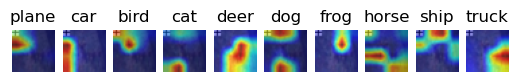

tensor([9], device='cuda:0')


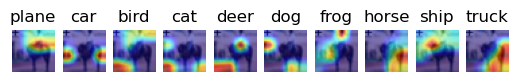

tensor([7], device='cuda:0')


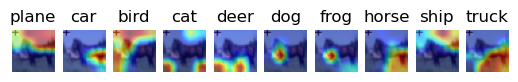

tensor([9], device='cuda:0')


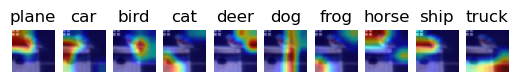

tensor([9], device='cuda:0')


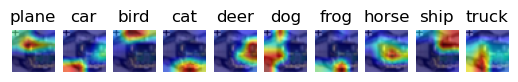

tensor([9], device='cuda:0')


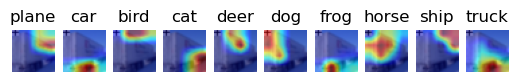

tensor([9], device='cuda:0')


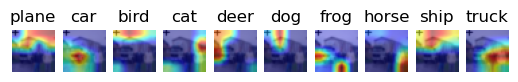

tensor([3], device='cuda:0')


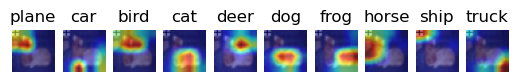

tensor([9], device='cuda:0')


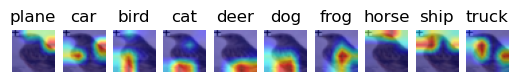

tensor([9], device='cuda:0')


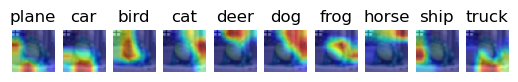

tensor([9], device='cuda:0')


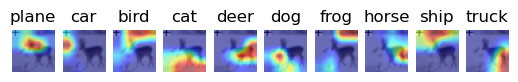

tensor([9], device='cuda:0')


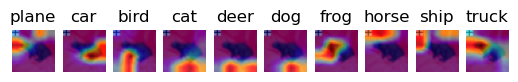

tensor([9], device='cuda:0')


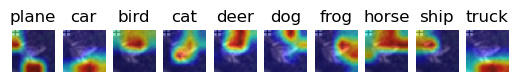

tensor([9], device='cuda:0')


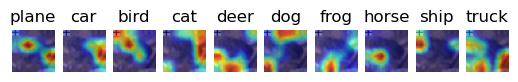

tensor([9], device='cuda:0')


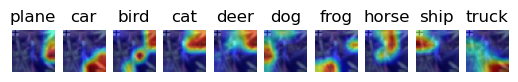

tensor([9], device='cuda:0')


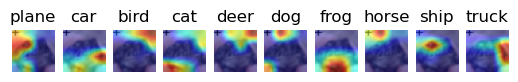

tensor([9], device='cuda:0')


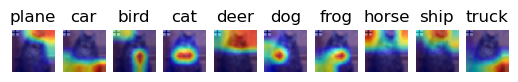

tensor([7], device='cuda:0')


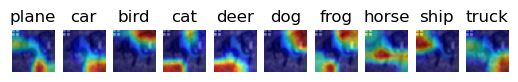

tensor([9], device='cuda:0')


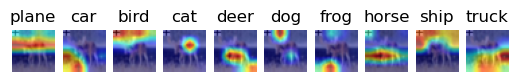

tensor([9], device='cuda:0')


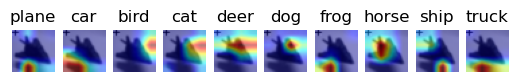

In [28]:
from typing import Text
from yaml import tokens
import torch
from torch.autograd import Variable
from torch.utils.data import DataLoader, TensorDataset
from torchvision.datasets import MNIST, EMNIST

from helper import Helper
import random
from utils.text_load import Dictionary
from models.word_model import RNNModel
from models.resnet import ResNet18
from models.lenet import LeNet
from models.edge_case_cnn import Net
from models.resnet9 import ResNet9
from utils.text_load import *
import numpy as np
import copy
from torch.utils.data import Dataset, DataLoader

import os
from torchvision import datasets, transforms
from collections import defaultdict
from torch.utils.data import DataLoader, random_split, TensorDataset
import pickle
from gradcam import GradCAM, GradCAMpp
from gradcam.utils import visualize_cam
import PIL
import matplotlib.pyplot as plt

label_dict = {
    0:'plane',
    1:'car',
    2:'bird',
    3:'cat',
    4:'deer',
    5:'dog',
    6:'frog',
    7:'horse',
    8:'ship',
    9:'truck'
}
 
def main():
    model = ResNet18(10)
    model.cuda()

    params = torch.load("D:\code\code_xwd\Durable-Federated-Learning-Backdoor\FL_Backdoor_CV\Backdoor_saved_models_update1_noniid_EC0_cifar10_Neurotoxin_GradMaskRation0.95_EE3801\\target_model_epoch_2050.pth")
    model.load_state_dict(params)
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.2,
                                                    momentum=0.09,
                                                    weight_decay=0.4)
    
    gradcam = GradCAM.from_config(model_type='resnet', arch=model, layer_name='layer4')
    for k in range (10, 30):
        
        # get an image and normalize with mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)
        pil_img = PIL.Image.open(f'D:\code\code_xwd\dataset\patched-cifar-10\pic\{k}.jpg')
        torch_img = transforms.Compose([transforms.Resize((32, 32)), transforms.ToTensor()])(pil_img).cuda()
        normed_img = transforms.Normalize([0.4914, 0.4822, 0.4465], [0.2023, 0.1994, 0.2010])(torch_img)[None]
        # get a GradCAM saliency map on the class index 10.
        output = model(normed_img)
        pred = output.data.max(1)[1]
        print(pred)
        plt.figure()
        for i in range(0, 10):
            mask, logit = gradcam(normed_img, class_idx=i)
    
            # make heatmap from mask and synthesize saliency map using heatmap and img
            heatmap, cam_result = visualize_cam(mask, torch_img)
        
            
            # plt.subplot(1,2,1)
            
            # plt.imshow(transforms.ToPILImage()(heatmap))
            plt.subplot(1, 10, i+1)
            plt.axis("off")
            plt.imshow(transforms.ToPILImage()(cam_result))
            plt.title(label_dict[i])
        plt.show()
    


if __name__ == '__main__':
    main()
